In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [21]:
df=pd.read_csv('score_updated.csv')

In [22]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   95 non-null     float64
 1   Scores  95 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 2.2 KB


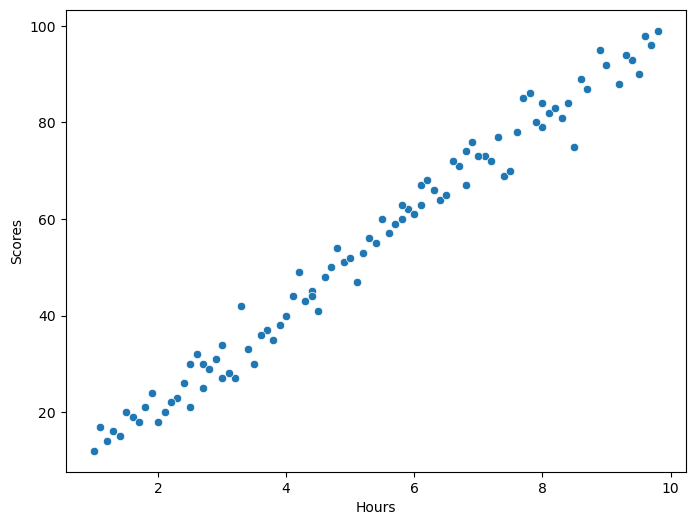

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(df,x='Hours',y='Scores')
plt.show()

In [26]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.2)

In [28]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [29]:
model.coef_

array([[9.82047618]])

In [30]:
model.intercept_

array([2.11206523])

In [31]:
Y_test[:4]

array([[54],
       [82],
       [50],
       [18]])

In [32]:
Y_pred=model.predict(X_test)
Y_pred[:4]

array([[49.25035088],
       [81.65792227],
       [48.26830326],
       [21.75301758]])

In [33]:
df2=pd.DataFrame({'Actual':Y_test.flatten(),'Predicted':Y_pred.flatten()})
df2

,Actual,Predicted
0,54,49.250351
1,82,81.657922
2,50,48.268303
3,18,21.753018
4,96,97.370684
5,24,20.770970
6,84,80.675875
7,87,87.550208
8,18,18.806875
9,95,89.514303


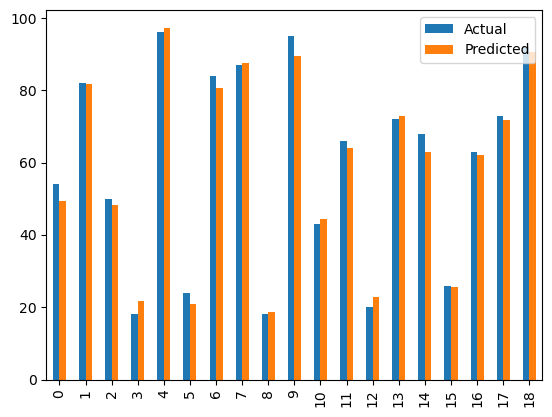

In [34]:
df2.plot(kind='bar')
plt.show()

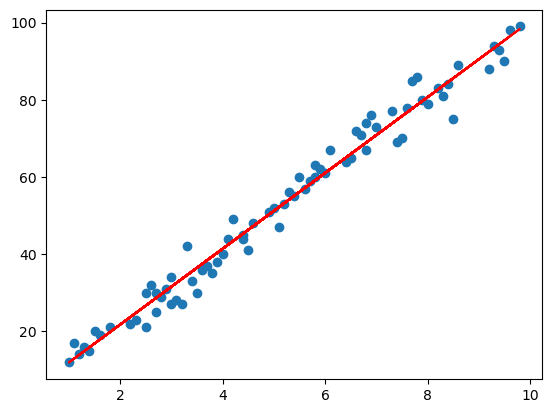

In [35]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,model.predict(X_train),color='red')
plt.show()

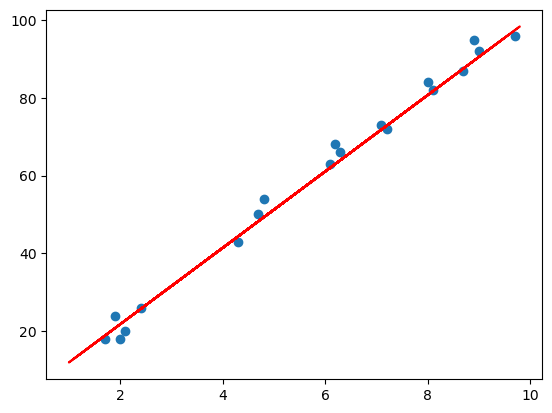

In [36]:
plt.scatter(X_test,Y_test)
plt.plot(X_train,model.predict(X_train),color='red')
plt.show()

In [37]:
r2_score(Y_train,model.predict(X_train))

0.9782093595324095

In [38]:
r2_score(Y_test,Y_pred)

0.9899775353238884